# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
#plt.style.use('seaborn-v0_8-darkgrid')
import statsmodels.api as sm
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [9]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [10]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

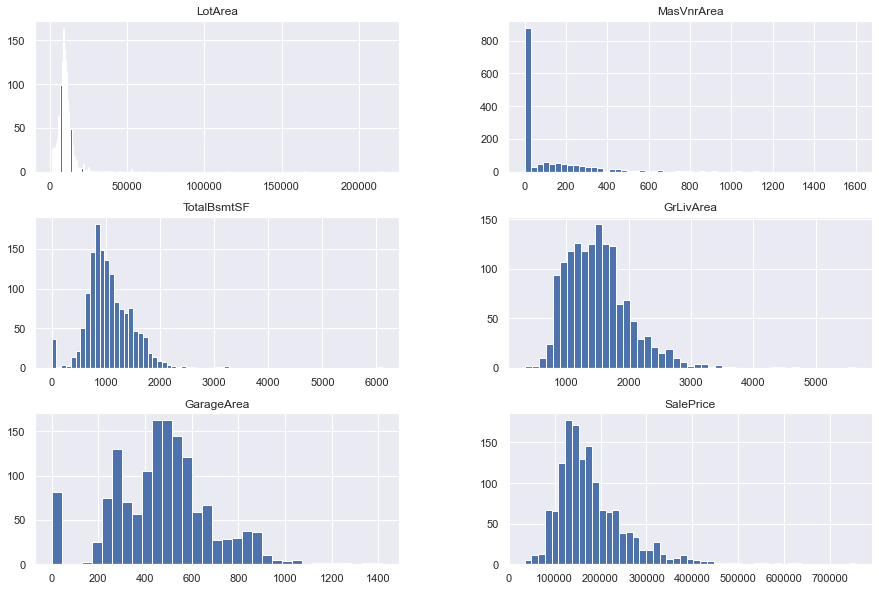

In [12]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [13]:
# Your code here - build a linear regression model with un-transformed features
X =ames[['LotArea', 'MasVnrArea', 'TotalBsmtSF','GrLivArea', 'GarageArea']]
y = ames['SalePrice']
model = sm.OLS(y, sm.add_constant(X))
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:12:42   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [ ]:
# Your written answer here
# R-squared -About 67.6% of the variance in house prices is explained by these 5 predictors. 
#That’s reasonably strong for an initial model.
#F-statistic (603, p < 0.05) → The model is highly significant. At least one predictor is strongly related to SalePrice.
#LotArea: The coefficient is 0.2568. This suggests that for every one square foot increase in LotArea, the SalePrice is estimated to increase by approximately $0.26, holding all other variables constant. The p-value is 0.040, which is statistically significant at a 0.05 significance level.
#const = -15,250.The intercept: predicted SalePrice when all features = 0.
#MasVnrArea: The coefficient is 55.0481. This indicates that for every one square foot increase in MasVnrArea, the SalePrice is estimated to increase by approximately $55.05, holding all other variables constant. The p-value is 0.000, indicating high statistical significance.
#TotalBsmtSF: The coefficient is 44.1640. This means that for every one square foot increase in TotalBsmtSF, the SalePrice is estimated to increase by approximately $44.16, holding all other variables constant. The p-value is 0.000, indicating high statistical significance.
#GrLivArea: The coefficient is 63.8443. This suggests that for every one square foot increase in GrLivArea, the SalePrice is estimated to increase by approximately $63.84, holding all other variables constant. The p-value is 0.000, indicating high statistical significance.
#GarageArea: The coefficient is 93.4629. This indicates that for every one square foot increase in GarageArea, the SalePrice is estimated to increase by approximately $93.46, holding all other variables constant. The p-value is 0.000, indicating high statistical significance.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [14]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
# Conversion factor
sqft_to_sqm = 1 / 0.092903  # ≈ 10.764

# Get coefficients as a DataFrame
coefs = model_results.params.copy()

# Features that are in square feet
sqft_features = ["LotArea", "MasVnrArea", "TotalBsmtSF", "GrLivArea", "GarageArea"]

# Convert those coefficients to per square meter
coefs_metric = coefs.copy()
coefs_metric[sqft_features] = coefs_metric[sqft_features] * sqft_to_sqm

# Combine into a table for clarity
coef_table = pd.DataFrame({
    "USD per ft²": coefs[sqft_features],
    "USD per m²": coefs_metric[sqft_features]
})

print(coef_table.round(2))

             USD per ft²  USD per m²
LotArea             0.26        2.76
MasVnrArea         55.05      592.53
TotalBsmtSF        44.16      475.38
GrLivArea          63.84      687.21
GarageArea         93.46     1006.03


In [16]:
# Your written answer here


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [19]:
# Your code here - center data
# Select predictors
X = ames[["LotArea", "MasVnrArea", "TotalBsmtSF", "GrLivArea", "GarageArea"]]
y = ames["SalePrice"]

# Center predictors (subtract column means)
X_centered = X - X.mean()



In [20]:
# Your code here - build a new model
# Fit new OLS model
Xc_with_const = sm.add_constant(X_centered)
model_centered = sm.OLS(y, Xc_with_const).fit()

print(model_centered.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:10:33   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+05   1186.695    152.200      

In [ ]:
# Your written answer here - interpret the new intercept
#With the centered data and average values for for LotArea, MasVnrArea, TotalBsmtSF, GrLivArea, and GarageArea. the new selling price will be 180,600 USD

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [25]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
# predictors only (exclude SalePrice)
predictors = ["LotArea", "MasVnrArea", "TotalBsmtSF", "GrLivArea", "GarageArea"]

# Center predictors (already done in Step 4)
X_centered = ames[predictors] - ames[predictors].mean()

# Standardize predictors (divide by standard deviation)
X_std = X_centered / X_centered.std()

# Add intercept for regression
X_std = sm.add_constant(X_std)

# Target variable
y = ames["SalePrice"]

# Fit model
model_std = sm.OLS(y, X_std).fit()

# Extract standardized coefficients (ignore intercept)
std_coefs = model_std.params.drop('const')

# Identify the most important feature
most_important = std_coefs.abs().idxmax()
max_coef = std_coefs[most_important]

# Display results
print("Standardized coefficients:")
print(std_coefs.round(3))
print(f"\nMost important feature: {most_important} (standardized coefficient = {round(max_coef,3)})")

Standardized coefficients:
LotArea         2565.014
MasVnrArea      9967.343
TotalBsmtSF    19349.104
GrLivArea      33558.348
GarageArea     20011.011
dtype: float64

Most important feature: GrLivArea (standardized coefficient = 33558.348)


In [ ]:
# Your written answer here - identify the "most important" feature
GrLivArea (Above-ground living area) has the largest standardized coefficient (≈ 33,558).

This means that, holding other features constant, differences in above-ground living area contribute more to explaining variation in house prices than any other predictor in the model.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!